In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
import sympy.abc

In [5]:
x = sympy.abc.x
p = (x**8 - 1)
p

x**8 - 1

In [6]:
p.factor()

(x - 1)*(x + 1)*(x**2 + 1)*(x**4 + 1)

In [8]:
(p ** 2).expand()

x**16 - 2*x**8 + 1

In [9]:
sympy.integrate(p, x)

x**9/9 - x

In [10]:
sympy.integrate(p, (x, 0 , 1))

-8/9

In [12]:
trapez_nodes = np.array([0, 1], dtype=np.float64)
trapez_weights = np.array([1/ 2., 1/2.], dtype=np.float64)


In [13]:
trapez_rule = (trapez_nodes, trapez_weights)

In [15]:
trapez_rule[1]

array([0.5, 0.5])

In [17]:
from collections import namedtuple

In [18]:
QRule = namedtuple("QRule", ["nodes", "weights", "interval"])

In [19]:
trapez_rule = QRule(trapez_nodes, trapez_weights, (0, 1))

In [20]:
trapez_rule

QRule(nodes=array([0., 1.]), weights=array([0.5, 0.5]), interval=(0, 1))

In [21]:
trapez_rule.weights

array([0.5, 0.5])

In [22]:
trapez_rule[1]

array([0.5, 0.5])

In [23]:
for i in trapez_rule:
  print(i)

[0. 1.]
[0.5 0.5]
(0, 1)


In [33]:
class whatever:
  def __init__(self):
    self.a = 19
  
  def __getattr__(self, atrb):
    print(atrb)
    return 42

In [34]:
my_object = whatever()

In [27]:
my_object.__dict__

{'a': 19}

In [30]:
my_object.a == my_object.__dict__["a"]

True

In [35]:
my_object.something

something


42

In [36]:
def integrate(f, q_rule):
  return np.sum(q_rule.weights * f(q_rule.nodes))

In [39]:
- np.cos(1) + np.cos(0) - integrate(np.sin, trapez_rule)

0.03896220172791198

In [106]:
def generate_equispaced_nodes(n):
  return np.linspace(0, 1, n + 1, endpoint=False)[1:
                                                  
leggauss

SyntaxError: ignored

In [53]:
def generate_interpolatory_quadrature_rule(nodes):
  n_of_nodes = nodes.shape[0]
  if n_of_nodes == 1:
    weights = np.array([1.], dtype=np.float64)
    return QRule(nodes=nodes, weights=weights, interval=(0, 1))
  
  weights = np.empty((n_of_nodes,), dtype=np.float64)

  x = sympy.abc.x
  for i in range(n_of_nodes):
    k = 1
    for j in range(n_of_nodes):
      if i == j:
        continue
      k *= (x - nodes[j]) / (nodes[i] - nodes[j])
    weights[i] = sympy.integrate(k, (x, 0, 1))
  
  return QRule(nodes=nodes, weights=weights, interval=(0, 1))

In [50]:
generate_interpolatory_quadrature_rule(trapez_nodes)

QRule(nodes=array([0., 1.]), weights=array([0.5, 0.5]), interval=(0, 1))

In [59]:
from functools import lru_cache

@lru_cache(100)
def generate_nc_quadrature_rule(n):
  nodes = generate_equispaced_nodes(n)
  return generate_interpolatory_quadrature_rule(nodes)

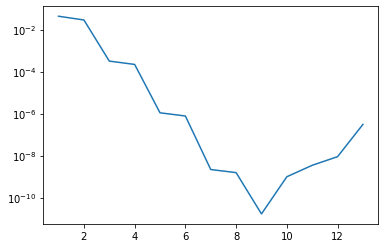

In [66]:
errors = []
for i in range(1, 14):
  q_rule = generate_nc_quadrature_rule(i)
  q_result = integrate(np.sin, q_rule)
  exact_result = np.cos(0) - np.cos(1)
  error = np.abs(exact_result - q_result) / np.abs(exact_result)
  errors.append(error)

plt.yscale("log")
plt.plot(range(1, 14), errors)


In [77]:
def estimate_nc_error(f, n_of_points):
  f_numpy = sympy.lambdify(x, f)
  exact_result = sympy.integrate(f, (sympy.abc.x, 0, 1))
  errors = []
  for i in range(1, n_of_points + 1):
    q_rule = generate_nc_quadrature_rule(i)
    q_result = integrate(f_numpy, q_rule)
    error = np.abs(exact_result - q_result) / np.abs(exact_result)
    errors.append(error)
  return errors


In [70]:
x = sympy.abc.x
f = x**2 - x ** 3 + sympy.sin(x)
f

-x**3 + x**2 + sin(x)

In [71]:
f.integrate(x)

-x**4/4 + x**3/3 - cos(x)

In [73]:
nodes = np.array([0, 0.2, 0.7])
f(nodes)

TypeError: ignored

In [75]:
f_numpy = sympy.lambdify(x, f)

In [76]:
f_numpy(nodes)

array([0.        , 0.23066933, 0.79121769])

In [78]:
errors = estimate_nc_error(sympy.sin(x), 14)

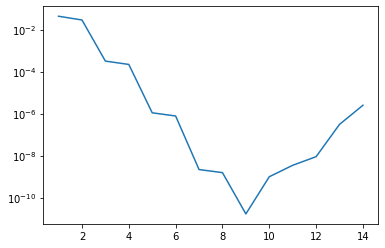

In [81]:
plt.yscale("log")
plt.plot(range(1, 15), errors)

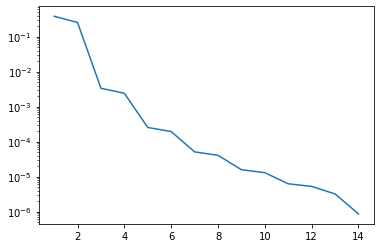

In [82]:
errors = estimate_nc_error(x ** (5 / 2), 14)
plt.yscale("log")
plt.plot(range(1, 15), errors)

In [84]:
def scale_quadrature_rule(q_rule, a, b):
  """
  Take a q_rule defined on [0, 1] and move it on [a, b]
  """
  i_length = b - a
  new_nodes = a + i_length * q_rule.nodes
  new_weights = q_rule.weights * i_length

  return QRule(new_nodes, new_weights, (a, b))


In [85]:
def estimate_nc_error(f, n_of_points, a=0, b=1):
  f_numpy = sympy.lambdify(x, f)
  exact_result = sympy.integrate(f, (sympy.abc.x, a, b))
  errors = []
  for i in range(1, n_of_points + 1):
    q_rule = generate_nc_quadrature_rule(i)
    if a != 0 or b != 1:
      q_rule = scale_quadrature_rule(q_rule, a, b)
    q_result = integrate(f_numpy, q_rule)
    error = np.abs(exact_result - q_result) / np.abs(exact_result)
    errors.append(error)
  return errors

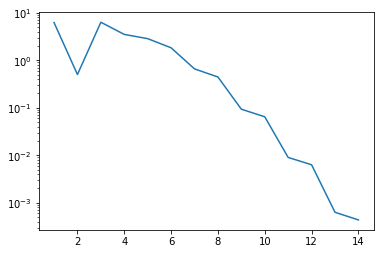

In [88]:
errors = estimate_nc_error(sympy.cos(x), 14, -5, 5)
plt.yscale("log")
plt.plot(range(1, 15), errors)

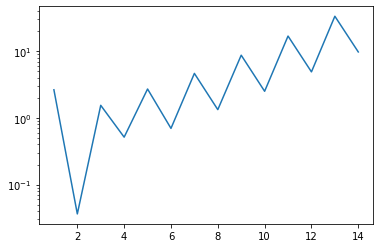

In [89]:
errors = estimate_nc_error(1 / (1 + x**2), 14, -5, 5)
plt.yscale("log")
plt.plot(range(1, 15), errors)

In [93]:
def generate_composite_formula(base_rule, n_of_cells):
  base_n_of_points = base_rule.nodes.shape[0]
  n_of_points = base_n_of_points * n_of_cells

  new_nodes = np.empty((n_of_points,), dtype=np.float64)
  new_weights = np.empty_like(new_nodes)

  for i in range(n_of_cells):
    a = 1 / float(n_of_cells) * i
    b = a + 1 / float(n_of_cells)
    cell_q_rule = scale_quadrature_rule(base_rule, a, b)
    new_nodes[i * base_n_of_points : (i + 1) * base_n_of_points] = cell_q_rule.nodes
    new_weights[i * base_n_of_points : (i + 1) * base_n_of_points] = cell_q_rule.weights

  return QRule(new_nodes, new_weights, (0, 1))

In [94]:
base_rule = generate_nc_quadrature_rule(1)
generate_composite_formula(base_rule, 4)

QRule(nodes=array([0.125, 0.375, 0.625, 0.875]), weights=array([0.25, 0.25, 0.25, 0.25]), interval=(0, 1))

In [98]:
def estimate_error_against_cells(f, base_formula, n_of_cells, a=0, b=1):
  f_numpy = sympy.lambdify(x, f)
  exact_result = sympy.integrate(f, (sympy.abc.x, a, b))
  errors = []
  for i in range(1, n_of_cells + 1):
    q_rule = generate_composite_formula(base_formula, i)
    if a != 0 or b != 1:
      q_rule = scale_quadrature_rule(q_rule, a, b)
    q_result = integrate(f_numpy, q_rule)
    error = np.abs(exact_result - q_result) / np.abs(exact_result)
    errors.append(error)
  return errors

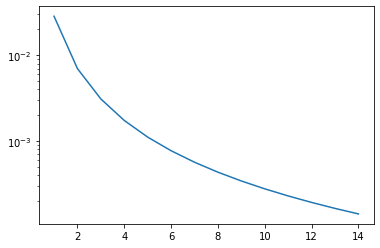

In [100]:
errors = estimate_error_against_cells(
    sympy.sin(x),
    generate_nc_quadrature_rule(2),
    14)
plt.yscale("log")
plt.plot(range(1, 15), errors)

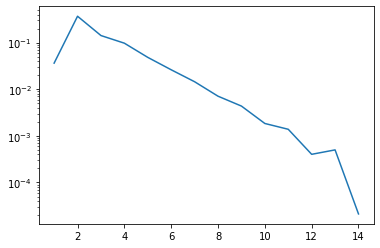

In [101]:
errors = estimate_error_against_cells(
    1 / (1 + x**2),
    generate_nc_quadrature_rule(2),
    14, -5, 5)
plt.yscale("log")
plt.plot(range(1, 15), errors)

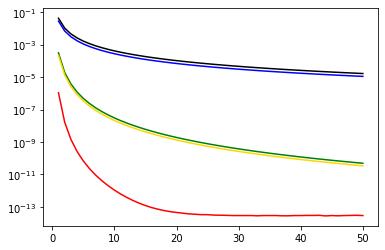

In [103]:
K = 50
errors1 = estimate_error_against_cells(
    sympy.sin(x),
    generate_nc_quadrature_rule(1),
    K)
errors2 = estimate_error_against_cells(
    sympy.sin(x),
    generate_nc_quadrature_rule(2),
    K)
errors3 = estimate_error_against_cells(
    sympy.sin(x),
    generate_nc_quadrature_rule(3),
    K)
errors4 = estimate_error_against_cells(
    sympy.sin(x),
    generate_nc_quadrature_rule(4),
    K)
errors5 = estimate_error_against_cells(
    sympy.sin(x),
    generate_nc_quadrature_rule(5),
    K)
plt.yscale("log")
plt.plot(range(1, K + 1), errors1, color="black")
plt.plot(range(1, K + 1), errors2, color="blue")
plt.plot(range(1, K + 1), errors3, color="green")
plt.plot(range(1, K + 1), errors4, color="gold")
plt.plot(range(1, K + 1), errors5, color="red")

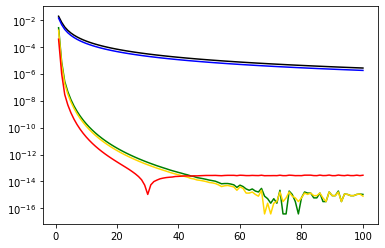

In [105]:
K = 100
f = 1 / (1 + x**2)
errors1 = estimate_error_against_cells(
    f,
    generate_nc_quadrature_rule(1),
    K)
errors2 = estimate_error_against_cells(
    f,
    generate_nc_quadrature_rule(2),
    K)
errors3 = estimate_error_against_cells(
    f,
    generate_nc_quadrature_rule(3),
    K)
errors4 = estimate_error_against_cells(
    f,
    generate_nc_quadrature_rule(4),
    K)
errors5 = estimate_error_against_cells(
    f,
    generate_nc_quadrature_rule(5),
    K)
plt.yscale("log")
plt.plot(range(1, K + 1), errors1, color="black")
plt.plot(range(1, K + 1), errors2, color="blue")
plt.plot(range(1, K + 1), errors3, color="green")
plt.plot(range(1, K + 1), errors4, color="gold")
plt.plot(range(1, K + 1), errors5, color="red")